> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>  In this project, I will analyze a data set that collects information about 100K medical appointments in Brazil, while the main focus being wether patients showed up to their appointmemts or not. The main goal is to grasp trends betweeen patients' medical conditions, status and how it affects them showing up to their appointments. 


### Question(s) for Analysis
>I have formulated various questions to help me reach a well constructed conclusions which are:

1- does gender play a role?
2- does having a chronic diseas affect wether they show up or not?
3- patterns of no-show up across different age groups

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline 



In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [7]:
#@title Default title text
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv("drive/MyDrive/project/appointments.csv")
df.head()
#   types and look for instances of missing or possibly errant data.


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
df.shape

(110527, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
df.duplicated().sum()

0


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
len(df[df["Age"] == 0]),len(df[df["Age"] < 0])

(3539, 1)

In [13]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [14]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

df['ScheduledHour'] = pd.to_datetime(df.ScheduledDay).dt.hour
df['AppointmentTime'] = pd.to_datetime(df.AppointmentDay).dt.time

df['ScheduledDay'] = df['ScheduledDay'].dt.date
df['AppointmentDay'] = df['AppointmentDay'].dt.date

df['AppointmentWeekDay'] = pd.to_datetime(df.AppointmentDay).dt.day_name()
df['AppointmentMonth'] = pd.to_datetime(df.AppointmentDay).dt.month_name()

df['WaitingDays'] = df.AppointmentDay - df.ScheduledDay

df.WaitingDays = df.WaitingDays.astype('str')
df.WaitingDays = df.WaitingDays.apply(lambda x: x.split()[0])
df.WaitingDays = df.WaitingDays.astype('int64')

df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledHour,AppointmentTime,AppointmentWeekDay,AppointmentMonth,WaitingDays
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18,00:00:00,Friday,April,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16,00:00:00,Friday,April,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16,00:00:00,Friday,April,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17,00:00:00,Friday,April,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16,00:00:00,Friday,April,0


In [15]:
df.AppointmentTime.nunique()

1

In [16]:
df.drop(columns="AppointmentTime", axis=1, inplace=True)

In [17]:
df['IsMale'] = df['Gender'].replace({'F': 0, 'M': 1})

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledHour,AppointmentWeekDay,AppointmentMonth,WaitingDays,IsMale
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18,Friday,April,0,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16,Friday,April,0,1
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16,Friday,April,0,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17,Friday,April,0,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16,Friday,April,0,0


In [18]:
df_absentees = df[df['No-show'] == 'Yes']
df_attendees = df[df['No-show'] == 'No']

In [19]:
attendees = df_attendees
absentees = df_absentees

In [20]:
df['No-show'].replace(['Yes', 'No'], [0,1],inplace=True)


In [21]:
df_absentees.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ScheduledHour,WaitingDays,IsMale
count,2.231900e+04,2.231900e+04,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000
mean,1.467523e+14,5.652259e+06,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371,11.162597,15.831489,0.346118
std,2.549905e+14,7.429686e+04,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670,0.496198,3.219395,16.605912,0.475742
min,5.628261e+06,5.122866e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,-6.000000,0.000000
25%,4.176779e+12,5.614192e+06,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,4.000000,0.000000
50%,3.156794e+13,5.657916e+06,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,11.000000,0.000000
75%,9.454270e+13,5.703175e+06,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,23.000000,1.000000
max,9.996585e+14,5.789986e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,21.000000,179.000000,1.000000


In [22]:
df_attendees.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ScheduledHour,WaitingDays,IsMale
count,8.820800e+04,8.820800e+04,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000
mean,1.476845e+14,5.681137e+06,37.790064,0.093903,0.204392,0.073837,0.030417,0.022742,0.291334,10.676322,8.754659,0.351011
std,2.563747e+14,6.931225e+04,23.338878,0.291695,0.403259,0.261507,0.171732,0.162750,0.454380,3.207961,14.550398,0.477289
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000
25%,4.168386e+12,5.646218e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000
50%,3.176184e+13,5.685684e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2.000000,0.000000
75%,9.433715e+13,5.731078e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,12.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,21.000000,179.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Data 

### Research Question 1  : Does gender play a role?

	Attendees
Gender
F    57246
M    30962
Name: No-show, dtype: int64
----------------------------------------
	Absentees
Gender
F    14594
M     7725
Name: No-show, dtype: int64


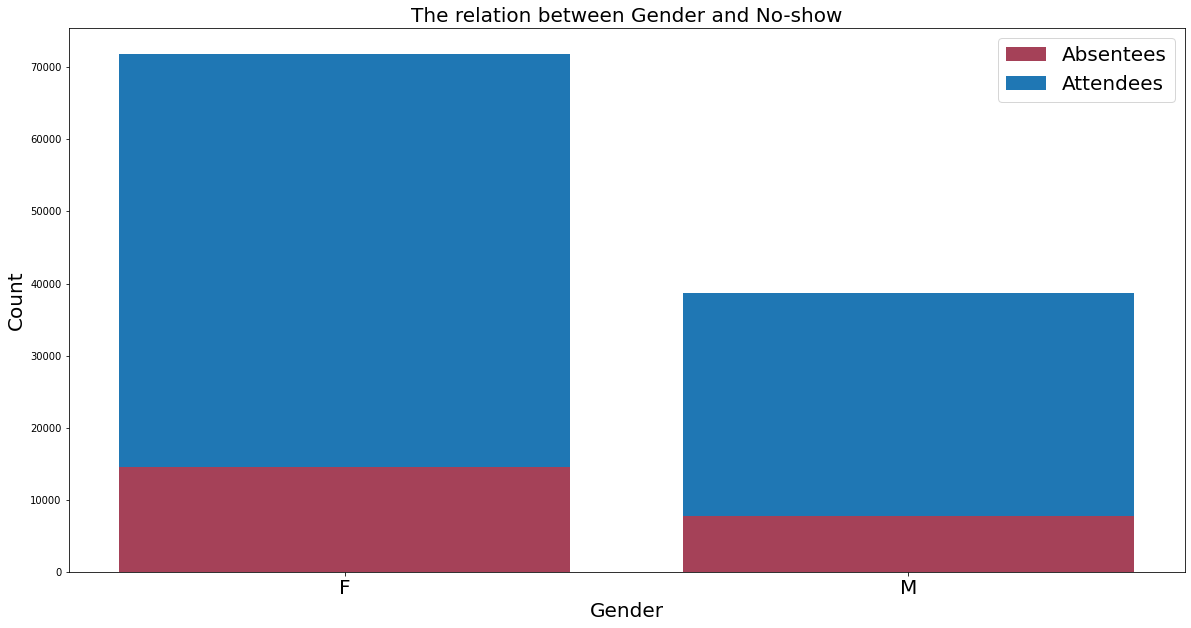

In [23]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
Gender_absentees = df_absentees.groupby('Gender')['No-show'].count()
Gender_attendees = df_attendees.groupby('Gender')['No-show'].count()
print('\tAttendees')
print(Gender_attendees)
print('-'*40)
print('\tAbsentees')
print(Gender_absentees)
plt.figure(figsize=(20, 10))
plt.bar(np.arange(len(Gender_absentees)),
        Gender_absentees, label='Absentees',color='#A54158')
plt.bar(np.arange(len(Gender_attendees)), Gender_attendees,
        label='Attendees',bottom=Gender_absentees)
plt.xticks(np.arange(len(Gender_absentees)),
           Gender_attendees.index, rotation=0, fontsize=20)
def design(x,y):
    '''axes design'''
    plt.title(f'The relation between {x} and No-show', fontsize=20)
    plt.xlabel(x, fontsize=20)
    plt.ylabel(y, fontsize=20)
    plt.legend(prop={'size': 20})
    plt.show()
design('Gender','Count')

----------------------------------------------------------------------------------------------------
	attendees Proportion
Gender
M    0.800321
F    0.796854
Name: No-show, dtype: float64
----------------------------------------
	absentees Proportion
Gender
M    0.199679
F    0.203146
Name: No-show, dtype: float64


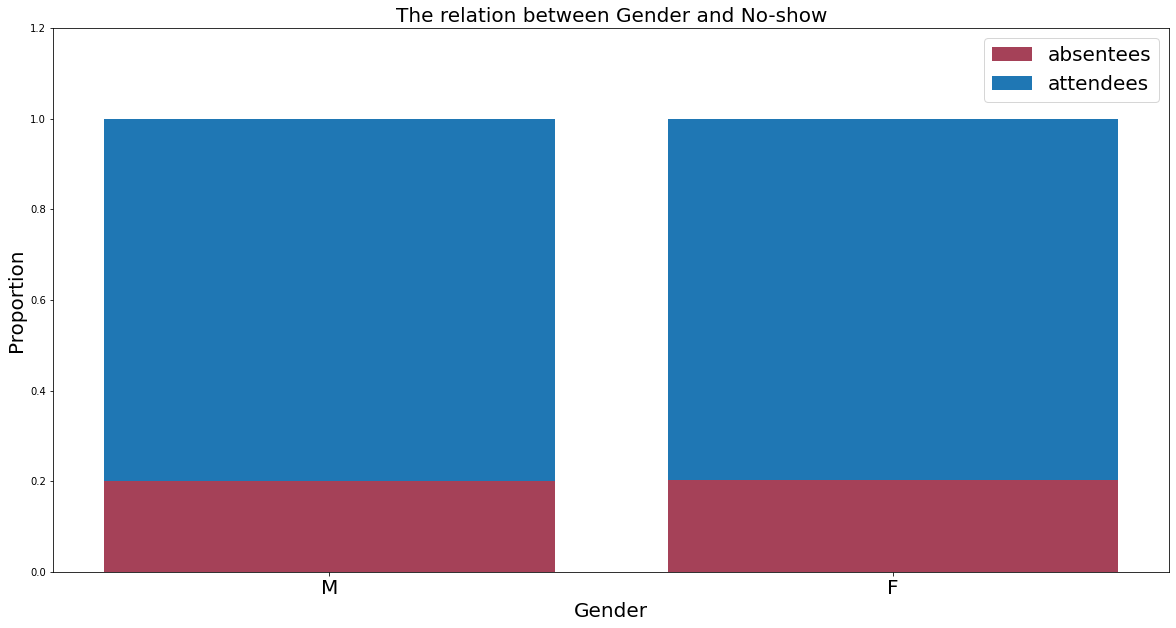

In [25]:
total_Gender = df.groupby('Gender')['No-show'].count()
p_absentees_Gender = ((Gender_absentees/total_Gender)
                ).fillna(0).sort_values(ascending=True)
p_attendees_Gender = ((Gender_attendees/total_Gender)
               ).fillna(0).sort_values(ascending=False)
print('-'*100)
print('\tattendees Proportion')
print(p_attendees_Gender)
print('-'*40)
print('\tabsentees Proportion')
print(p_absentees_Gender)
plt.figure(figsize=(20, 10))
plt.bar(np.arange(len(p_absentees_Gender)),
        p_absentees_Gender, label='absentees',color='#A54158')
plt.bar(np.arange(len(p_attendees_Gender)), p_attendees_Gender,
        label='attendees', bottom=p_absentees_Gender)
plt.xticks(np.arange(len(total_Gender)),
           p_attendees_Gender.index, rotation=0, fontsize=20)
plt.ylim(0,1.2)
design('Gender','Proportion')

Since analyzing the numbers of attendees and absentees based on gender wasn't very descriptive, I created the second graph to analyse the percentage of attendees and absesntees in each gender, to provide more adequate insights. from the graphs above we can conclude that the gender doesnt impact wether or not patients show up yo their appointments as the differences are negligble. 

Research Question 2: Does having a chronic disease affect wether they show up or not?

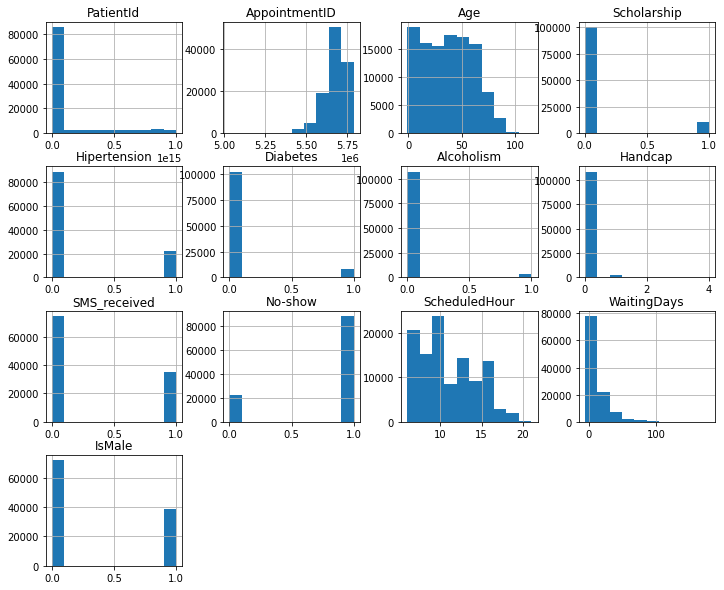

In [26]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(12,10));

In [27]:
df.corr()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledHour,WaitingDays,IsMale
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749,0.001461,0.001927,-0.001467,0.007890
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618,0.162602,-0.049355,-0.771830,0.018496
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643,0.060319,0.014151,0.034820,-0.106440
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,-0.029135,-0.024392,-0.030421,-0.114293
Hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,0.035701,-0.033222,-0.017215,-0.055718
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,0.015180,-0.014411,-0.027188,-0.032554
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,0.000196,-0.002710,-0.038519,0.106167
Handcap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,0.006076,0.002672,-0.019843,0.022814
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,-0.126431,0.060313,0.398145,-0.046298
No-show,0.001461,0.162602,0.060319,-0.029135,0.035701,0.015180,0.000196,0.006076,-0.126431,1.000000,-0.060697,-0.186231,0.004119


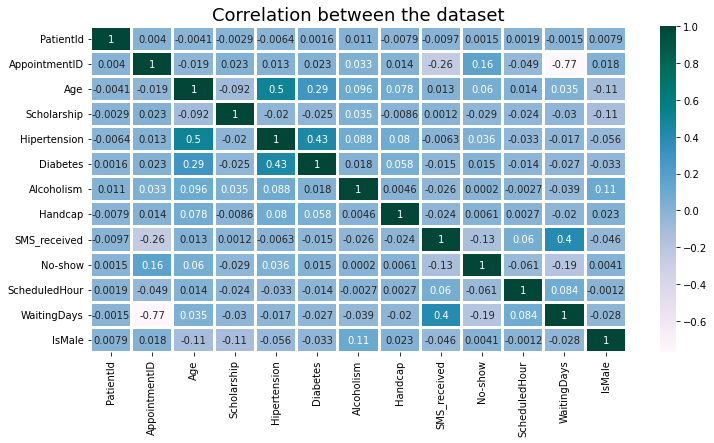

In [28]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True,linewidth=2, cmap= 'PuBuGn')
plt.title('Correlation between the dataset', fontsize=18)
plt.show()

Hypertension and Diabetes have moderate postive correlation(0.43).

Hypertension and age have strong postive correlation(0.5)


Research question 3: patterns of no-show up across different age groups

In [29]:
df['Age'].unique()


array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [30]:
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [31]:
df['Age'].mode()

0    0
dtype: int64

In [32]:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [33]:
df.query('Age == -1')


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledHour,AppointmentWeekDay,AppointmentMonth,WaitingDays,IsMale
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,1,8,Monday,June,0,0


In [34]:
df.drop(df.index[99832], inplace=True)

In [35]:
df.query('Age == 0')['Age'].count()

3539

The age variations are a bit unfamiliar, as the maximum is 115 which is very rare but we can't drop it as it is possible. however, there are 3539 entries whose age are recorded as zero, and we cant assume that these are unborned babies as in this case the mother will be the patient.

In [39]:
fig = px.histogram(df,"Age", labels=dict(x = 'Age'))

fig.update_layout(title_text = 'The distribution of the age', title_x = 0.8)


fig.show()

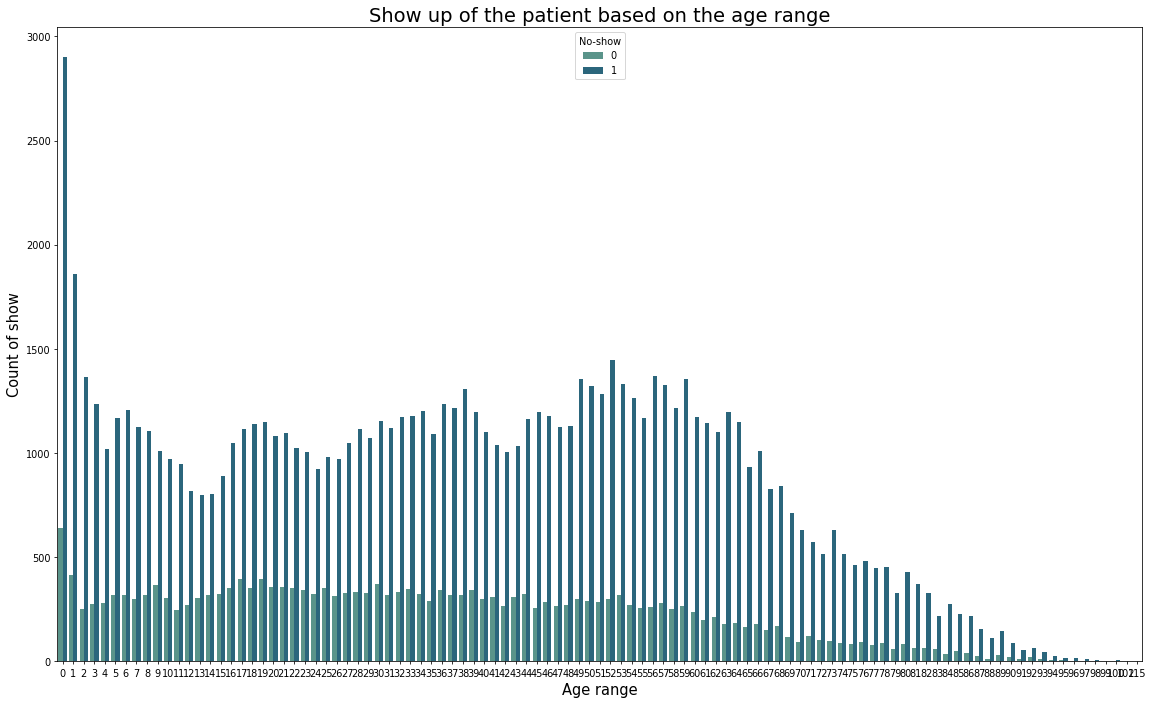

In [48]:
attendees = df_attendees
absentees = df_absentees

plt.figure(figsize=(20,12),dpi=70)

sns.countplot(x='Age', hue='No-show',palette= 'crest',data=df)

plt.ylabel('Count of show',fontsize=15)
plt.xlabel('Age range',fontsize=15)
plt.title('Show up of the patient based on the age range',fontsize=20)

plt.show()

The graph shows that the older people get, the more likely they are to show up to their appointments which may be attributed to them having worse health than those of younger age.

<a id='conclusions'></a>
## Conclusions

> 
the analysis have shown that Gender doesnt have an impact on wether patients show up to their appointments or not. However, some chronic diseases may have an impact such as hypertension and diabetes as well as handi caped patients, while alcoholism doesnt. Last but not least, elderly people tend to show up to their appointments more that younger ones. 

### Limitations
The Age column had 0 value in some cases which doesnt make any sense. 

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])